<a href="https://colab.research.google.com/github/Starleen1996/Machine_Learning_modelos/blob/main/Haga_Lo_que_hicimos_Validacion_De_modelos_metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Para correr las lineas de código debemos importar : /content/diabetes.csv

In [1]:
import pandas as pd

In [2]:
datos = pd.read_csv('/content/diabetes.csv')

In [3]:
datos

,glicemia,presion_sanguinea,grasa_subcutanea_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1
...,...,...,...,...,...,...
389,88,44,510,43.3,0.222,1
390,88,39,110,36.5,1.057,1
391,58,26,16,28.4,0.766,0
392,76,48,180,32.9,0.171,0


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   glicemia                  394 non-null    int64  
 1   presion_sanguinea         394 non-null    int64  
 2   grasa_subcutanea_triceps  394 non-null    int64  
 3   insulina                  394 non-null    float64
 4   imc                       394 non-null    float64
 5   diabetes                  394 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 18.6 KB


#### 1 - Para la construcción de un modelo de machine learning se necesitan datos. Como tarea inicial, realiza la lectura de la base de datos de diabetes y divide los datos en variables explicativas y variable objetivo (x e y). La variable objetivo es la columna que quieres clasificar, que contiene la información de si el paciente tiene o no diabetes. Las variables explicativas son todas las columnas excepto la de diabetes. La separación de los datos se puede hacer con la selección de columnas con pandas.

In [5]:
X = datos.drop(columns='diabetes', axis=1)
y = datos['diabetes']

#### Una etapa muy importante en proyectos de clasificación es la validación de los modelos, para identificar si hay una generalización del modelo para datos nuevos. Realiza la división de los datos entre entrenamiento, validación y prueba. Utiliza el 5% de los datos para prueba y con el resto, deja el 25% para validación. En el momento de la separación, usa el parámetro stratify a partir de la variable objetivo para mantener la proporción de los datos.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X,X_test,y,y_test = train_test_split(X,y,test_size=0.05,stratify=y,random_state=5) # Modelo de entrenamiento
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.25,stratify=y,random_state=5) # Modelo de validación

La etapa de modelado de datos consiste en utilizar un algoritmo capaz de identificar patrones en los datos y clasificar los valores. A partir del modelo es posible extraer una tasa de acierto para entender su desempeño. Crea 2 modelos utilizando los algoritmos DecisionTreeClassifier y RandomForestClassifier y evalúa la precisión de entrenamiento y prueba, eligiendo el valor 3 para el parámetro max_depth del algoritmo DecisionTreeClassifier y el valor 2 para el max_depth del algoritmo RandomForestClassifier, para que los modelos no se especialicen demasiado en el patrón de los datos de entrenamiento.

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [9]:
# Modelo arbol de decisión con 3 niveles (max_depth)
modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(X_train,y_train)
print('Precisión entrenamiento: ',modelo.score(X_train,y_train))
print('Precisión de validación: ',modelo.score(X_val,y_val))

Precisión entrenamiento:  0.7571428571428571
Precisión de validación:  0.776595744680851


In [10]:
# Modelo RandomForestClasifier
modelo_1 = RandomForestClassifier(max_depth=2)
modelo_1.fit(X_train,y_train)
print('Precisión entrenamiento: ',modelo_1.score(X_train,y_train))
print('Precisión de validación: ',modelo_1.score(X_val,y_val))

Precisión entrenamiento:  0.7357142857142858
Precisión de validación:  0.7340425531914894


La tasa de acierto generalmente no proporciona información suficiente para entender el comportamiento del modelo. La matriz de confusión es una herramienta más completa, capaz de proporcionar los aciertos y errores del modelo para cada clase. Construye una matriz de confusión para cada uno de los modelos para evaluar el desempeño de la predicción. Para construir la matriz, usa el método predict para generar las predicciones de los valores y comparar con los valores reales de la base de datos.

In [11]:
#Importamos una nueva herramienta llamada la matriz de confusión para el modelo Arbol de decisión
from sklearn.metrics import confusion_matrix

In [12]:
y_previsto = modelo.predict(X_val)
matriz_confusion = confusion_matrix(y_val,y_previsto)
print(matriz_confusion)

[[52 11]
 [10 21]]


In [13]:
# Vamos a graficar la matriz de confusión
from sklearn.metrics import ConfusionMatrixDisplay

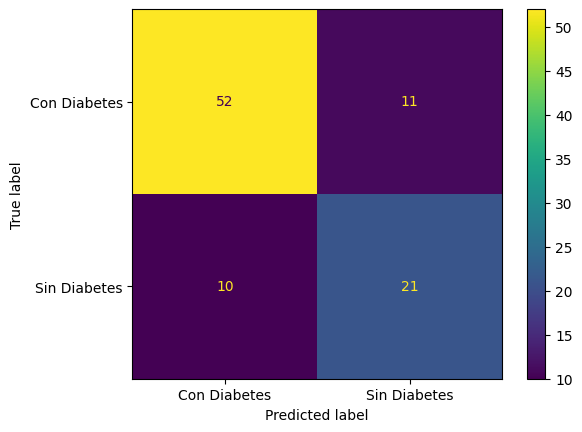

In [15]:
## Esto es una matriz de confusión
visualizacion = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion,display_labels=['Con Diabetes','Sin Diabetes'])
visualizacion.plot();

In [16]:
## Vamos a ver la MATRIZ DE CONFUSION PARA EL MODELO RANDOM_FORETS_CLASIFFIER
y_previsto_1 = modelo_1.predict(X_val)
matriz_confusion_1 = confusion_matrix(y_val,y_previsto_1)
print(matriz_confusion_1)

[[58  5]
 [20 11]]


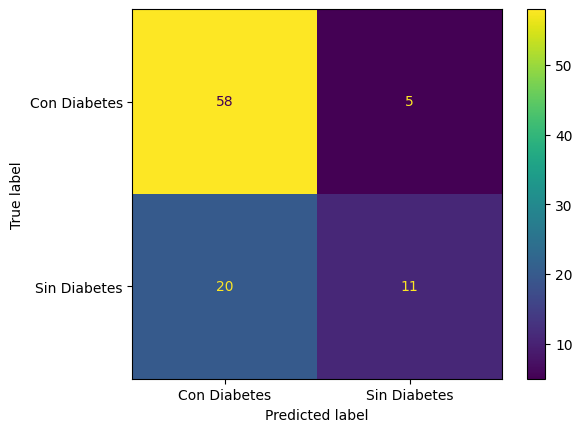

In [17]:
## Esto es una matriz de confusión
visualizacion_1 = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion_1,display_labels=['Con Diabetes','Sin Diabetes'])
visualizacion_1.plot();

# Este modelo presenta un sesgo mayor de los pacientes con diabetes (20)

## HAGA LO QUE HICIMOS -METRICAS DE EVALUACIÓN

Para una evaluación completa de un modelo de clasificación, podemos explorar métricas que evalúan la tasa de acierto general y también para cada clase de la variable objetivo de forma individual. Extrae las métricas de precisión, recall, precisión y F1-Score de los modelos de clasificación generados en el desafío de la clase 1. La biblioteca Scikit-Learn tiene funciones para calcular cada una de las métricas, solo necesitas importar y utilizar como parámetros los valores reales y previstos por el modelo.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/6Jp6rKyC/Captura-de-tela-2025-03-22-120744.png" alt="Captura-de-tela-2025-03-22-120744" border="0"></a>

<a href="https://ibb.co/351SbY7t"><img src="https://i.ibb.co/wZypqrRD/matriz-confusion.png" alt="matriz-confusion" border="0"></a>

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score

In [20]:
print(f'La preciisón del modelo es de: {precision_score(y_val, y_previsto)}')
print(f'La Sensibilidad(Recall) del modelo es de: {recall_score(y_val, y_previsto)}')
print(f'La Exactitud (accuracy)  del modelo es de: {accuracy_score(y_val, y_previsto)}')

La preciisón del modelo es de: 0.65625
La Sensibilidad(Recall) del modelo es de: 0.6774193548387096
La Exactitud (accuracy)  del modelo es de: 0.776595744680851


In [21]:
print(f'El F1 Score  del modelo es de: {f1_score(y_val, y_previsto)}')
# Mientras mas lejos de 1, el modelo se esta desempeñando muy mal

El F1 Score  del modelo es de: 0.6666666666666666


2 - Además de métricas numéricas, se pueden explorar gráficos para evaluar el rendimiento de un modelo y comprender si puede diferenciar bien una clase de otra. Obtén la curva ROC y la métrica AUC de los modelos de clasificación generados en el desafío de la clase 1, comparando las curvas en el mismo gráfico. La curva ROC se puede generar usando el método RocCurveDisplay.from_predictions.

In [22]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/dariyasydykova/open_projects/master/ROC_animation/animations/cutoff.gif')

In [23]:
from sklearn.metrics import RocCurveDisplay

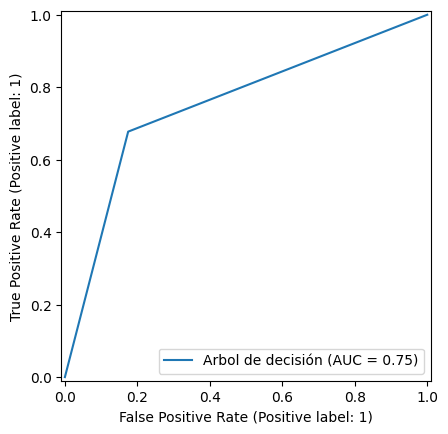

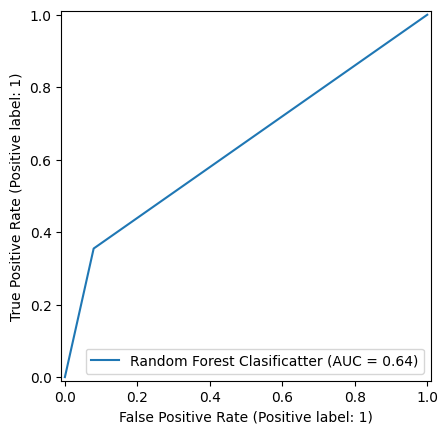

In [25]:
RocCurveDisplay.from_predictions(y_val, y_previsto, name='Arbol de decisión')
# Nota: La curva se quiebra en el valor positivo (0.7).

RocCurveDisplay.from_predictions(y_val, y_previsto_1, name='Random Forest Clasificatter')
# Nota: La curva se quiebra en el valor positivo (0.38) aproximadamente.

In [26]:
from sklearn.metrics import roc_auc_score

In [27]:
print(f'El área bajo la curva ROC del modelo Arbol de Decisión es de: {roc_auc_score(y_val, y_previsto)}')
print(f'El área bajo la curva ROC del modelo Random Forest es de: {roc_auc_score(y_val, y_previsto_1)}')

El área bajo la curva ROC del modelo Arbol de Decisión es de: 0.7514080901177674
El área bajo la curva ROC del modelo Random Forest es de: 0.6377368151561701


Además de la curva ROC, la curva de precisión x recall se puede usar para evaluar el rendimiento de modelos, siendo más interesante para datos desbalanceados. Obtén la curva de precisión x recall y la métrica AP de los modelos de clasificación generados en el desafío de la clase 1, comparando las curvas en el mismo gráfico. La curva de precisión x recall se puede generar usando el método PrecisionRecallDisplay.from_predictions.

In [28]:
Image(url='https://paulvanderlaken.com/wp-content/uploads/2019/08/roc.gif')

In [29]:
from sklearn.metrics import PrecisionRecallDisplay

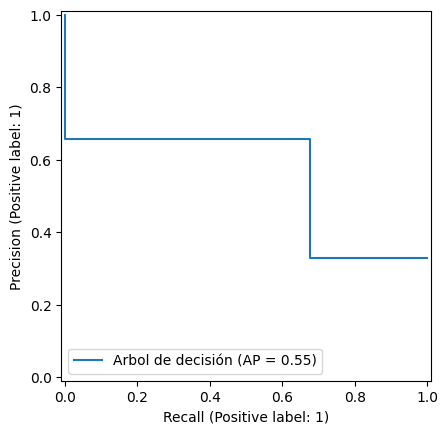

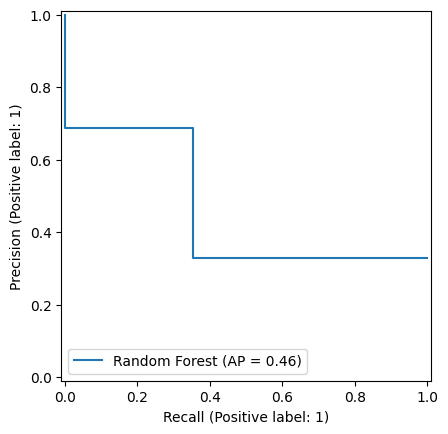

In [30]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name='Arbol de decisión')
#
PrecisionRecallDisplay.from_predictions(y_val, y_previsto_1, name='Random Forest')
#

In [31]:
from sklearn.metrics import average_precision_score

In [32]:
print(f'El área bajo la curva de precisión y sensibilidad para el modelo Arbol de Decisión es de: {average_precision_score(y_val, y_previsto)}')
print(f'El área bajo la curva de precisión y sensibilidad para el modelo Random Forest es de: {average_precision_score(y_val, y_previsto_1)}')

El área bajo la curva de precisión y sensibilidad para el modelo Arbol de Decisión es de: 0.5509394303363074
El área bajo la curva de precisión y sensibilidad para el modelo Random Forest es de: 0.4567175703500343


Un resumen de las principales métricas de clasificación puede ser muy útil para resumir la información y generar insights de forma rápida. Genera los informes de métricas de los modelos de clasificación construidos en el desafío de la clase 1. El informe de métricas se puede generar a partir de la función classification_report de la biblioteca Scikit-Learn.

In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_val, y_previsto)) # Informe Metricas para el modelo arbol de decisión
print(classification_report(y_val, y_previsto_1))# Informe Metricas para el modelo Random Forest

              precision    recall  f1-score   support

           0       0.84      0.83      0.83        63
           1       0.66      0.68      0.67        31

    accuracy                           0.78        94
   macro avg       0.75      0.75      0.75        94
weighted avg       0.78      0.78      0.78        94

              precision    recall  f1-score   support

           0       0.74      0.92      0.82        63
           1       0.69      0.35      0.47        31

    accuracy                           0.73        94
   macro avg       0.72      0.64      0.65        94
weighted avg       0.73      0.73      0.71        94

